In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
 98% 302M/309M [00:02<00:00, 121MB/s]
100% 309M/309M [00:02<00:00, 125MB/s]


In [ ]:
import zipfile
!wget /content/human-emotions-datasethes.zip

zip_ref = zipfile.ZipFile('/content/human-emotions-datasethes.zip')
zip_ref.extractall()
zip_ref.close()

/content/human-emotions-datasethes.zip: Scheme missing.


In [ ]:
!ls EmotionsDataset

data


In [ ]:
!ls EmotionsDataset/data

angry  happy  nothing  sad


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('EmotionsDataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 1 directories and 0 images in EmotionsDataset.
There are 4 directories and 0 images in EmotionsDataset/data.
There are 0 directories and 1064 images in EmotionsDataset/data/angry.
There are 0 directories and 1037 images in EmotionsDataset/data/happy.
There are 0 directories and 751 images in EmotionsDataset/data/sad.
There are 0 directories and 1093 images in EmotionsDataset/data/nothing.


In [ ]:
for i in os.walk('EmotionsDataset'):
  print(i)

('EmotionsDataset', ['data'], [])
('EmotionsDataset/data', ['angry', 'happy', 'sad', 'nothing'], [])
('EmotionsDataset/data/angry', [], ['408.jpg', '266.jpg', '671.jpg', '864.jpg', '939.jpg', '519.jpg', '81.jpg', '402.jpg', '207.jpg', '91.jpg', '87.jpg', '287.jpg', '387.jpg', '823.jpg', '159.jpg', '751.jpg', '946.jpg', '167.jpg', '661.jpg', '226.jpg', '888.jpg', '960.jpg', '716.jpg', '313.jpg', '745.jpg', '404.jpg', '488.jpg', '455.jpg', '388.jpg', '471.jpg', '941.jpg', '413.jpg', '1056.jpg', '695.jpg', '978.jpg', '71.jpg', '754.jpg', '520.jpg', '280.jpg', '779.jpg', '547.jpg', '134.jpg', '770.jpg', '310.jpg', '333.jpg', '581.jpg', '631.jpg', '299.jpg', '866.jpg', '896.jpg', '40.jpg', '500.jpg', '942.jpg', '278.jpg', '550.jpg', '470.jpg', '1041.jpg', '73.jpg', '335.jpg', '663.jpg', '579.jpg', '143.jpg', '962.jpg', '205.jpg', '873.jpg', '862.jpg', '705.jpg', '61.jpg', '875.jpg', '947.jpg', '438.jpg', '831.jpg', '1051.jpg', '100.jpg', '381.jpg', '624.jpg', '281.jpg', '637.jpg', '810.jpg'

In [ ]:
num_data_dir = len(os.listdir('EmotionsDataset/data'))
num_data_dir

4

In [ ]:
num_data_images = len(os.listdir('EmotionsDataset/data/happy'))
num_data_images

1037

In [ ]:
import pathlib
data_dir = pathlib.Path('EmotionsDataset/data')
data_dir

PosixPath('EmotionsDataset/data')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['angry', 'happy', 'nothing', 'sad'], dtype='<U7')

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (224, 224, 3)


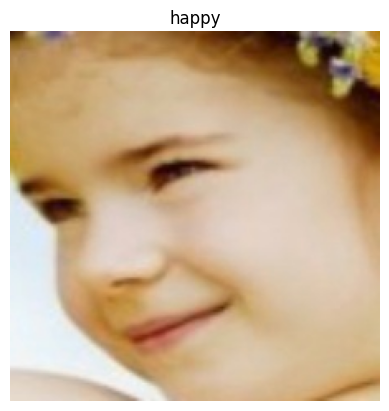

In [ ]:
image = view_random_image(target_dir='EmotionsDataset/data/', target_class='happy')

In [ ]:
image/255

array([[[0.24313725, 0.10196078, 0.03921569],
        [0.25882353, 0.12156863, 0.04313725],
        [0.28627451, 0.14509804, 0.05098039],
        ...,
        [0.71372549, 0.49803922, 0.09411765],
        [0.69803922, 0.49411765, 0.06666667],
        [0.68235294, 0.47843137, 0.04705882]],

       [[0.2627451 , 0.1254902 , 0.04705882],
        [0.2745098 , 0.1372549 , 0.05098039],
        [0.29803922, 0.16078431, 0.05098039],
        ...,
        [0.71372549, 0.50588235, 0.10588235],
        [0.70980392, 0.50196078, 0.08627451],
        [0.69019608, 0.49019608, 0.0627451 ]],

       [[0.30196078, 0.16078431, 0.05882353],
        [0.30980392, 0.17254902, 0.05490196],
        [0.33333333, 0.19215686, 0.05882353],
        ...,
        [0.70980392, 0.49803922, 0.10588235],
        [0.71372549, 0.51372549, 0.10196078],
        [0.69411765, 0.50588235, 0.08235294]],

       ...,

       [[0.90588235, 0.85882353, 0.80392157],
        [0.90588235, 0.85882353, 0.80392157],
        [0.90588235, 0

#Fitting the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/EmotionsDataset/data/'

In [ ]:
train_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(100,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(100, 3, activation='relu'),
    tf.keras.layers.Conv2D(100, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), # bütün şəkilləri vektor halına salır
    tf.keras.layers.Dense(4, activation='softmax')
])

Found 3158 images belonging to 4 classes.
Found 787 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
99/99 ━━━━━━━━━━━━━━━━━━━━ 1357s 14s/step - accuracy: 0.4654 - loss: 1.2387 - val_accuracy: 0.5845 - val_loss: 0.8570
Epoch 2/2
99/99 ━━━━━━━━━━━━━━━━━━━━ 1390s 14s/step - accuracy: 0.6262 - loss: 0.7752 - val_accuracy: 0.6582 - val_loss: 0.7566


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 100)       │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 280900)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │       1,123,604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,939,554 (15.03 MB)

 Trainable params: 1,313,184 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,370 (10.02 MB)

In [ ]:
len(train_data)

99

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


array([[[ 35,  31,  32],
        [ 25,  21,  22],
        [ 19,  15,  16],
        ...,
        [108,  66,  41],
        [112,  70,  45],
        [114,  72,  47]],

       [[ 15,  11,  12],
        [ 22,  18,  19],
        [ 24,  20,  21],
        ...,
        [ 91,  54,  28],
        [ 96,  56,  31],
        [ 97,  60,  34]],

       [[ 25,  21,  22],
        [ 29,  25,  26],
        [ 38,  34,  35],
        ...,
        [ 80,  48,  23],
        [ 84,  50,  25],
        [ 84,  52,  27]],

       ...,

       [[159, 108,  77],
        [163, 112,  81],
        [159, 108,  77],
        ...,
        [213, 215, 227],
        [220, 222, 234],
        [223, 225, 237]],

       [[157, 108,  78],
        [165, 116,  86],
        [138,  89,  59],
        ...,
        [217, 219, 231],
        [224, 226, 238],
        [225, 227, 239]],

       [[160, 111,  81],
        [158, 109,  79],
        [161, 112,  82],
        ...,
        [220, 222, 234],
        [228, 230, 242],
        [227, 229, 241]]], dtype=uint8)
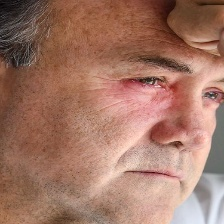

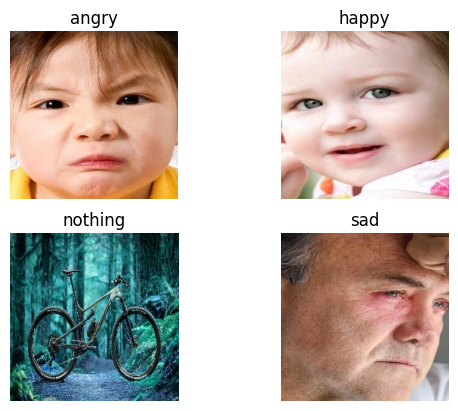

In [ ]:
plt.figure()
plt.subplot(2, 2, 1)
view_random_image('EmotionsDataset/data/', 'angry')
plt.subplot(2, 2, 2)
view_random_image('EmotionsDataset/data/', 'happy')
plt.subplot(2, 2, 3)
view_random_image('EmotionsDataset/data/', 'nothing')
plt.subplot(2, 2, 4)
view_random_image('EmotionsDataset/data/', 'sad')

In [ ]:
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/EmotionsDataset/data/'

In [ ]:
train_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training')

test_data = train_datagen.flow_from_directory(dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode='categorical')

Found 3158 images belonging to 4 classes.
Found 3945 images belonging to 4 classes.


In [ ]:
images, labels = next(train_data)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(4, activation='softmax')
])

In [ ]:
optimizer=Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 227ms/step - accuracy: 0.5721 - loss: 0.8389 - val_accuracy: 0.5781 - val_loss: 0.8387
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.5712 - loss: 0.8385 - val_accuracy: 0.5832 - val_loss: 0.8214
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.5913 - loss: 0.8172 - val_accuracy: 0.5629 - val_loss: 0.8258
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 214ms/step - accuracy: 0.5720 - loss: 0.8460 - val_accuracy: 0.5743 - val_loss: 0.8084
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 228ms/step - accuracy: 0.5831 - loss: 0.8241 - val_accuracy: 0.5921 - val_loss: 0.8174


In [ ]:
model_1.evaluate(test_data)

124/124 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.6974 - loss: 0.6628


[0.6622447967529297, 0.6960709691047668]

In [ ]:
model_2.evaluate(test_data)

124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5978 - loss: 0.8192


[0.8230206966400146, 0.5969581604003906]

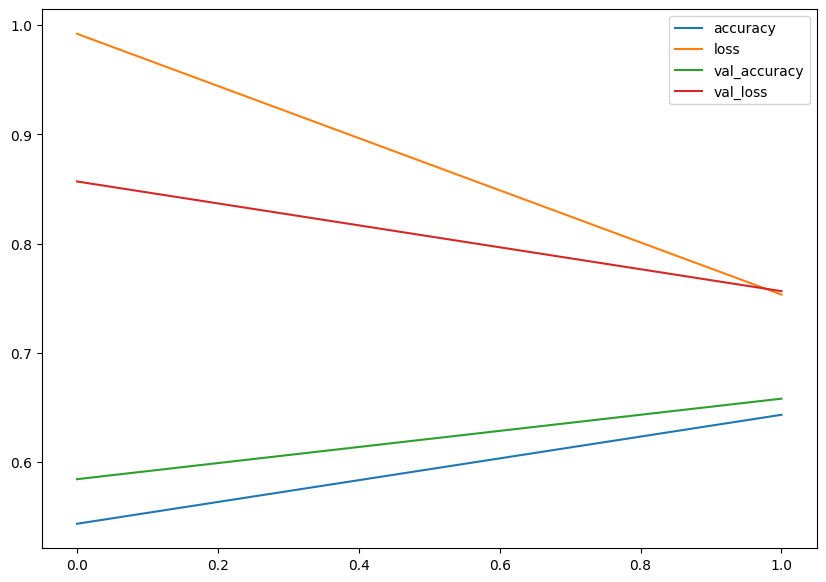

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
history_2.history

{'accuracy': [0.5563647747039795,
  0.5725142359733582,
  0.5740975141525269,
  0.5870804190635681,
  0.590880274772644],
 'loss': [0.8584699630737305,
  0.8408388495445251,
  0.8426907062530518,
  0.8204150795936584,
  0.8102360963821411],
 'val_accuracy': [0.5781448483467102,
  0.5832274556159973,
  0.5628970861434937,
  0.5743328928947449,
  0.592121958732605],
 'val_loss': [0.838725745677948,
  0.8213890790939331,
  0.8257737755775452,
  0.8084036707878113,
  0.8174358606338501]}

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

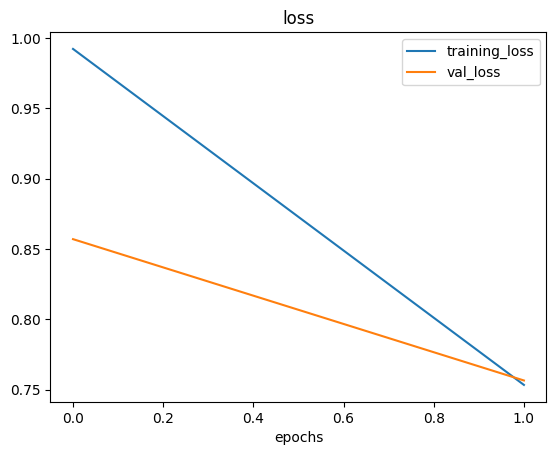

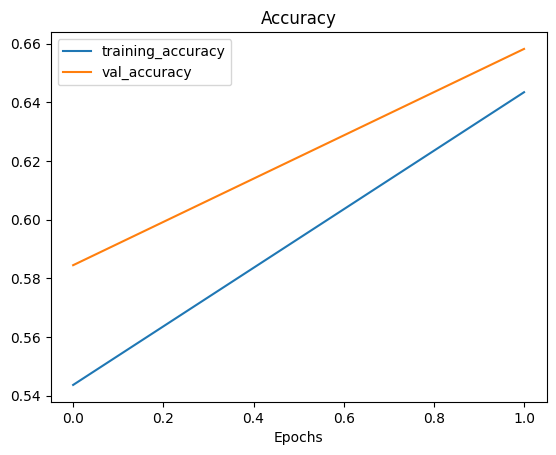

In [ ]:
plot_loss_curves(history_1)

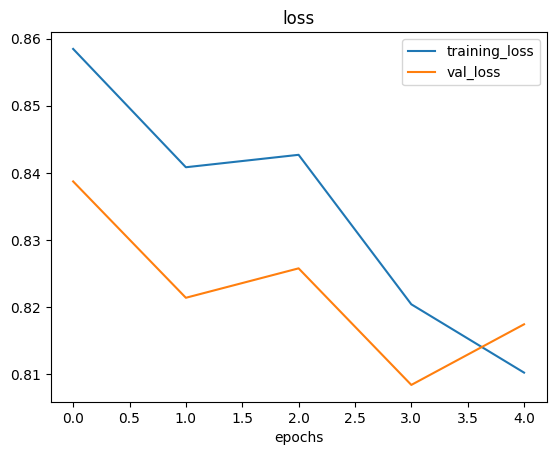

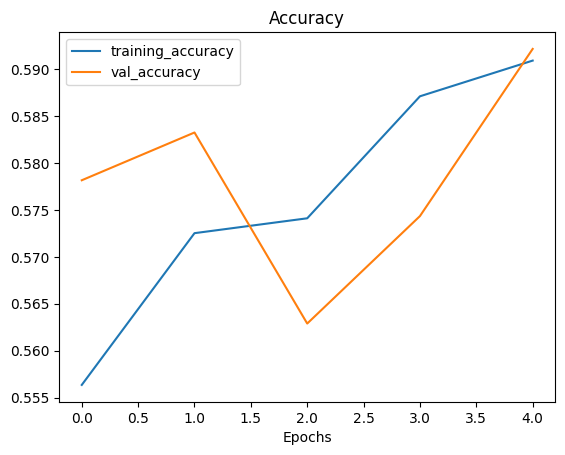

In [ ]:
plot_loss_curves(history_2)

# Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)

# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='categorical',
                                                                   subset='training',
                                                                   shuffle=False,
                                                                   seed=42)

print('Non-augmented data: ')
train_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=42)

IMG_SIZE=(224,224)
print('Non-augmented test data: ')
test_data = test_datagen.flow_from_directory(dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             seed=42)

Train data augmented: 
Found 3945 images belonging to 4 classes.
Non-augmented data: 
Found 3945 images belonging to 4 classes.
Non-augmented test data: 
Found 3945 images belonging to 4 classes.


In [ ]:
images, labels = next(train_data)

augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

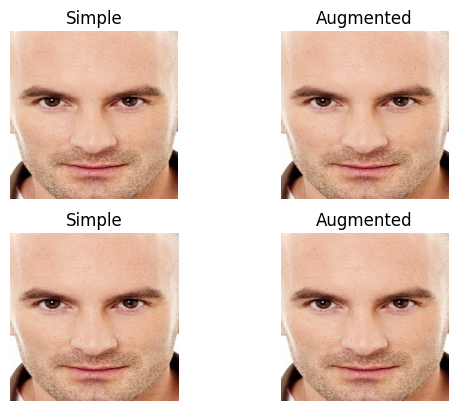

In [ ]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(2, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer=Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=2,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.3296 - loss: 2.8816 - val_accuracy: 0.3539 - val_loss: 1.1185
Epoch 2/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.4090 - loss: 1.1023 - val_accuracy: 0.5655 - val_loss: 0.8651


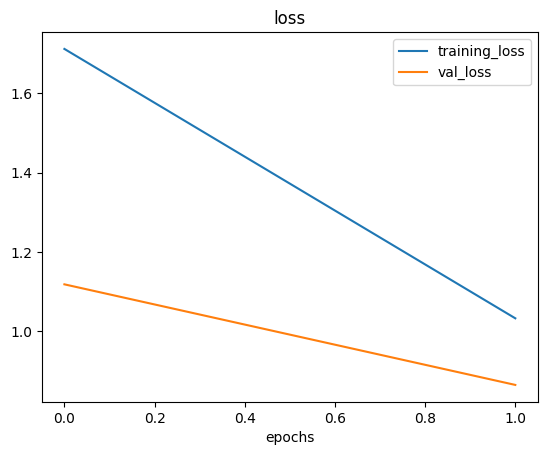

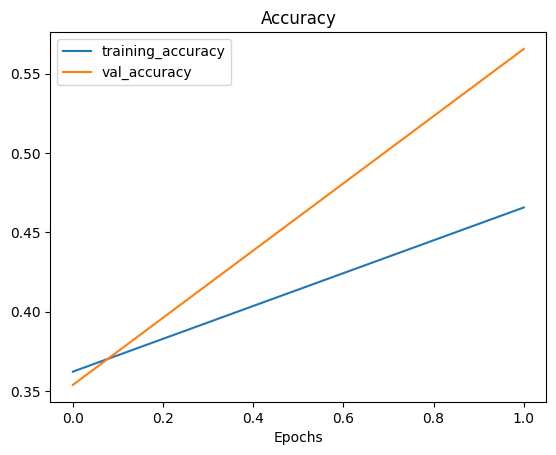

In [ ]:
plot_loss_curves(history_3)

In [ ]:
# Shuffle data

In [ ]:
print('Augmented and Shuffled train data:')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(dir,
                                                                                batch_size=32,
                                                                                target_size=IMG_SIZE,
                                                                                class_mode='categorical',
                                                                                subset='training',
                                                                                shuffle=True)

Augmented and Shuffled train data:
Found 3945 images belonging to 4 classes.


In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=(3, 3),
                            padding='valid',
                            kernel_initializer='he_normal',
                            activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_4.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data_augmented_and_shuffled,
                        epochs=2,
                        steps_per_epoch=len(train_data_augmented_and_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5288 - loss: 0.9806 - val_accuracy: 0.5883 - val_loss: 0.8418
Epoch 2/2
124/124 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.5729 - loss: 0.8535 - val_accuracy: 0.6053 - val_loss: 0.8320


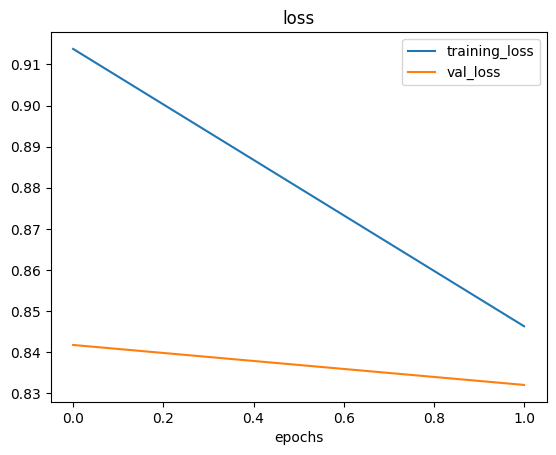

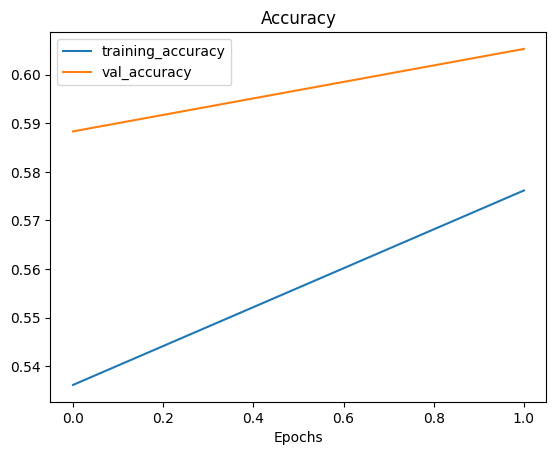

In [ ]:
plot_loss_curves(history_4)